In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as pt

#load the dataset
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,),(0.3081,))])
training_set = torchvision.datasets.MNIST(root='./data', train = True, download = True, transform = trans)
testing_set = torchvision.datasets.MNIST(root='./data', train = False, download = True, transform = trans)

train_loader = torch.utils.data.DataLoader(training_set, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(testing_set, batch_size=128, shuffle=True)

In [2]:
#Constructing Model
class Model(nn.Module):
    def __init__(self, inputlayer, hidden, output):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(inputlayer, hidden)
        self.fc2 = nn.Linear(hidden, hidden//2)
        self.fc3 = nn.Linear(hidden//2, output)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = x.view(-1, 28*28*1)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        return x

In [3]:
def compute_metrics(model, optimizer, trainloader, testloader, epochs=10):
    model.train()
    compute_train_losses, compute_train_accuracy = [], []
    epoch = 0
    while epoch < epochs:
        total_train_loss = 0.0
        train_correct = 0.0
        train_total = 0.0
        for inputs, labels in trainloader:
            optimizer.zero_grad()
            predicted_outputs = model(inputs)
            loss = loss_function(predicted_outputs, labels)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()
            predicted = predicted_outputs.argmax(dim=1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()
            
        compute_train_losses = (total_train_loss / len(trainloader))
        compute_train_accuracy = (train_correct / train_total)
        
        compute_test_losses, compute_test_acc = compute_test_metrics(model, testloader)
        print(f'Epoch: {epoch+1}, Train Loss: {compute_train_losses}, Test Loss: {compute_test_losses}')
        epoch +=1
    return compute_train_losses, compute_test_losses, compute_train_accuracy, compute_test_acc, sum(p.numel() for p in model.parameters())

def compute_test_metrics(model, testloader):
    compute_test_losses, compute_test_accuracies = [], []
    model.eval()
    total_test_loss = 0.0
    test_correct = 0.0
    test_total = 0.0
    with torch.no_grad():
        for inputs, labels in testloader:
            predicted_outputs = model(inputs)
            total_test_loss += loss_function(predicted_outputs, labels).item()
            predicted = predicted_outputs.argmax(dim=1)
            test_total += labels.size(0)
            test_correct += (predicted == labels).sum().item()
                
    compute_test_losses = (total_test_loss / len(testloader))
    compute_test_accuracies = (test_correct / test_total)
    return compute_test_losses, compute_test_accuracies

In [4]:
final_train_loss, final_test_loss = [], []
final_train_acc, final_test_acc = [], []
final_param_arr = []
for i in range(1, 12):
    # model = globals()[f"Model{i}"]()
    model = Model(784, 2*i, 10)
    total_params = sum(p.numel() for p in model.parameters())
    print(f'Number of paramters in Model {i}:',total_params)
    loss_function = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    train_loss, test_loss, train_acc, test_acc, params = compute_metrics(model, optimizer, train_loader, test_loader)
    final_train_loss.append(train_loss)
    final_test_loss.append(test_loss)
    final_train_acc.append(train_acc)
    final_test_acc.append(test_acc)
    final_param_arr.append(params)

Number of paramters in Model 1: 1593
Epoch: 1, Train Loss: 2.339079708432846, Test Loss: 2.3199885042407846
Epoch: 2, Train Loss: 2.3126948118718196, Test Loss: 2.3071761161466187
Epoch: 3, Train Loss: 2.304844122197328, Test Loss: 2.3032791554173335
Epoch: 4, Train Loss: 2.3029342338220395, Test Loss: 2.3026219862925856
Epoch: 5, Train Loss: 2.3025995175213194, Test Loss: 2.3025853633880615
Epoch: 6, Train Loss: 2.3025853633880615, Test Loss: 2.3025853633880615
Epoch: 7, Train Loss: 2.3025853633880615, Test Loss: 2.3025853633880615
Epoch: 8, Train Loss: 2.3025853633880615, Test Loss: 2.3025853633880615
Epoch: 9, Train Loss: 2.3025853633880615, Test Loss: 2.3025853633880615
Epoch: 10, Train Loss: 2.3025853633880615, Test Loss: 2.3025853633880615
Number of paramters in Model 2: 3180
Epoch: 1, Train Loss: 2.3173214489463043, Test Loss: 2.3087435070472426
Epoch: 2, Train Loss: 2.305849201389467, Test Loss: 2.303392349919186
Epoch: 3, Train Loss: 2.30257484145256, Test Loss: 2.301969890353

11
11


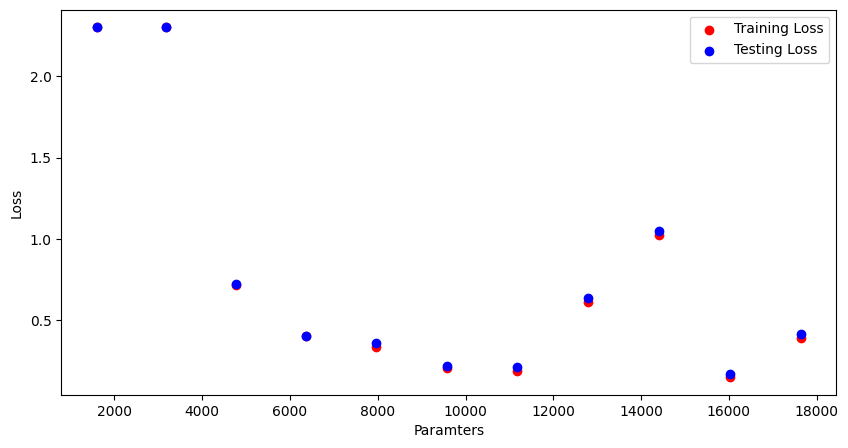

In [5]:
#plotting graphs
print(len(final_param_arr))
print(len(final_train_loss))
pt.figure(figsize=(10,5))
pt.scatter(final_param_arr, final_train_loss, color='r')
pt.scatter(final_param_arr, final_test_loss, color='b')
pt.xlabel('Paramters')
pt.ylabel('Loss')
pt.legend(['Training Loss', 'Testing Loss'])
pt.show()

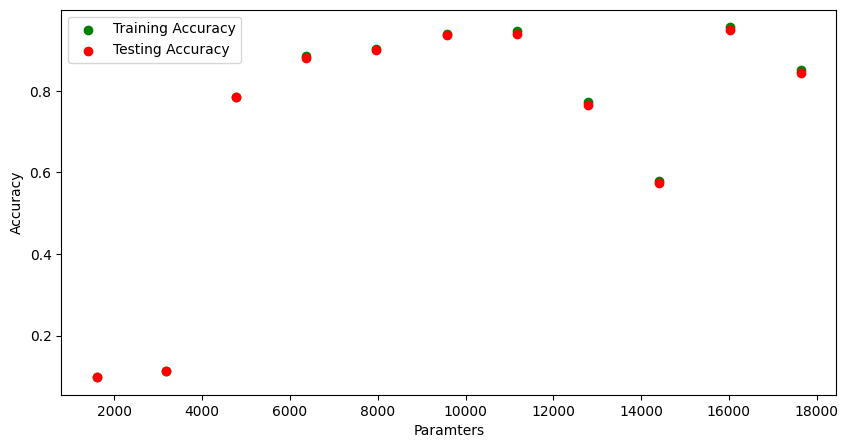

In [6]:
pt.figure(figsize=(10,5))
pt.scatter(final_param_arr, final_train_acc, color='green')
pt.scatter(final_param_arr, final_test_acc, color='red')
pt.xlabel('Paramters')
pt.ylabel('Accuracy')
pt.legend(['Training Accuracy', 'Testing Accuracy'])

pt.show()